In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-dataset/HR_Analytics.csv


In [2]:
HR_df = pd.read_csv("/kaggle/input/hr-analytics-dataset/HR_Analytics.csv")
HR_df.head()
HR_df.dtypes

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [10]:

HR_df.columns
HR_df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [4]:
num_of_employees = HR_df.shape[0]
#HR_df["EmpID"].value_counts()
num_of_employees

1480

In [5]:
att_count = HR_df[HR_df['Attrition']=="Yes"].shape[0]
att_count

att_percentage = round((att_count/num_of_employees) * 100,2)
att_percentage

avg_age = round(HR_df['Age'].mean(),2)
avg_age

avg_salary = round(HR_df['MonthlyIncome'].mean(),2)
avg_salary

avg_tenure = round(HR_df['YearsAtCompany'].mean(),2)
avg_tenure

7.01

In [6]:
KPIs ={
    "Number_of_employees" : [num_of_employees],
    "att_count" : [att_count],
    "att_percentage" : [att_percentage],
    "avg_age" : [avg_age],
    "avg_salary" : [avg_salary],
    "avg_tenure" : [avg_tenure]
    
}

KPI_df = pd.DataFrame(KPIs)

KPI_df


,Number_of_employees,att_count,att_percentage,avg_age,avg_salary,avg_tenure
0,1480,238,16.08,36.92,6504.99,7.01


In [7]:
att_df = pd.DataFrame(HR_df['Attrition'].value_counts())
att_df

,count
Attrition,
No,1242
Yes,238


In [8]:
HR_df.set_index('EducationField')['Attrition']
HR_df.set_index('EducationField')['Attrition'].value_counts()

Attrition
No     1242
Yes     238
Name: count, dtype: int64

# Analysis


**How is attrition dependent on Age?**

In [13]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
att_by_age = HR_df.groupby(['Age','Attrition']).apply( lambda x:x['DailyRate'].count()).reset_index(name = 'Counts')
px.line(att_by_age,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

# **Observation **
*As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21*

In [16]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
att_by_education = HR_df.groupby(['EducationField','Attrition']).apply( lambda x:x['EducationField'].count()).reset_index(name = 'Counts')
px.line(att_by_education,x='EducationField',y='Counts',color='Attrition',title='Education wise Counts of People in an Organization')

In [24]:
HR_df.head()
att_by_monthincome = HR_df.groupby(['MonthlyIncome','Attrition']).apply( lambda x:x['MonthlyIncome'].count()).reset_index(name = 'Counts')
att_by_monthincome['MonthlyIncome']


0        1009
1        1051
2        1052
3        1081
4        1091
        ...  
1383    19859
1384    19926
1385    19943
1386    19973
1387    19999
Name: MonthlyIncome, Length: 1388, dtype: int64

In [26]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
att_by_monthincome['MonthlyIncome']=round(att_by_monthincome['MonthlyIncome'],-3)
att_by_monthincome['MonthlyIncome']

0        1000
1        1000
2        1000
3        1000
4        1000
        ...  
1383    20000
1384    20000
1385    20000
1386    20000
1387    20000
Name: MonthlyIncome, Length: 1388, dtype: int64

**Is income the main factor towards employee attrition?**

In [29]:

att_by_monthincome=HR_df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
att_by_monthincome['MonthlyIncome']=round(att_by_monthincome['MonthlyIncome'],-3)
att_by_monthincome=att_by_monthincome.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(att_by_monthincome,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

# # Observation 
*As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line*

**Does the Department of work impact attrition?**

In [31]:
att_by_dept = HR_df.groupby(['Department','Attrition']).apply( lambda x:x['Department'].count()).reset_index(name = 'Counts')
fig = px.bar(att_by_dept,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

# Observations 
*This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).*

**How does the environment satisfaction impact attrition?**

In [34]:
att_by_envirsatisfaction = HR_df.groupby(['EnvironmentSatisfaction','Attrition']).apply( lambda x:x['EnvironmentSatisfaction'].count()).reset_index(name = 'Counts')
fig = px.area(att_by_envirsatisfaction,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='EnvironmentSatisfaction wise Counts of People in an Organization')
fig.show()

# Observation 
*In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels*

**How does Job Satisfaction impact the Attrition?**

In [35]:
att_by_jobsat = HR_df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['JobSatisfaction'].count()).reset_index(name = 'Counts')
px.area(att_by_jobsat,x='JobSatisfaction',y='Counts',color='Attrition',title='JobSatifaction wise Attrition Counts of People in an Organization')

# Observation 
*With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to choose better opportunities.*

**Does company stocks for employees impact attrition?**

In [37]:
att_by_stocks = HR_df.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['StockOptionLevel'].count()).reset_index(name ='Counts')
px.bar(att_by_stocks,x='StockOptionLevel',y='Counts',color='Attrition',title='StockOptionLevel wise Attrition Counts of People in an Organization')

# Observation 
*The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.*

**Does gender impact attrition in an organisation?**

In [40]:
att_by_gender=HR_df.groupby(['Gender','Attrition']).apply(lambda x:x ['Gender'].count()).reset_index(name='Counts')
px.bar(att_by_gender,x='Gender',y='Counts',color='Attrition',title='Gender wise attrition counts in a organisation')

# Observation

*This data shows Male employees has the higher attrition rates (16.98%), followed by Female employees (14.72%).*

**How does Work Life Balance impact the overall attrition rates?**

In [42]:
att_by_wlb=HR_df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x ['WorkLifeBalance'].count()).reset_index(name='Counts')
px.bar(att_by_wlb,x='WorkLifeBalance',y='Counts',color='Attrition',title='Worklife balance impact on attrition counts in an organisation')

# Observation
*People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing*

**How does work experience affect attrition?**

In [44]:
att_by_workexp=HR_df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['NumCompaniesWorked'].count()).reset_index(name='Counts')
px.area(att_by_workexp,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Exp impact on attrition counts in an organisation')

# Observations 
*As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.*

**Does Employee Loyalty affect attrition?**

In [45]:
att_by_numofyears=HR_df.groupby(['YearsAtCompany','Attrition']).apply(lambda x:x['YearsAtCompany'].count()).reset_index(name='Counts')
px.area(att_by_numofyears,x='YearsAtCompany',y='Counts',color='Attrition',title='Number of years in the company wise attrition counts in an organisation')

# Observations
*As seen from the chart above, clearly, employees who have worked lesser number of years with the company, have a higher chances of leaving the organization to a different company. People who have worked over 20 years in the same company tend to stay in the same company they join.*

**How does Promotions in current role impact Attrition?**

Text(0.5, 1.0, 'YearsSinceLastPromotion Vs attrition counts in an organisation')

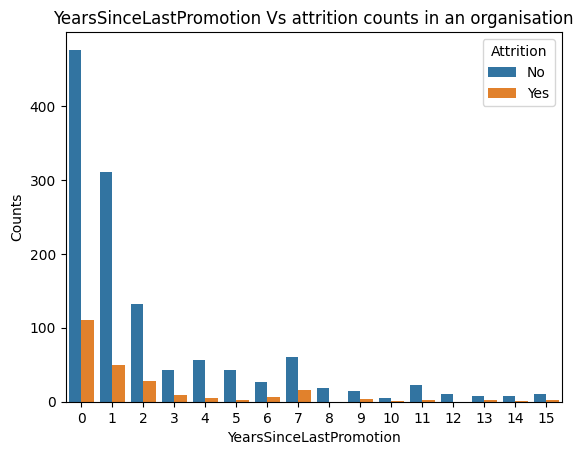

In [51]:
from numpy import median
att_by_promo=HR_df.groupby(['YearsSinceLastPromotion','Attrition']).apply(lambda x:x['YearsSinceLastPromotion'].count()).reset_index(name='Counts')
sns.barplot(data = att_by_promo,x='YearsSinceLastPromotion',y='Counts',hue = 'Attrition',estimator=median)
plt.title("YearsSinceLastPromotion Vs attrition counts in an organisation")

# Observations
*As seen from the chart above, clearly, employees who have worked lesser number of years with the company, have a higher chances of leaving the organization to a different company. People who have worked over 3 years in the same company tend to stay in the same company they join.*

**Does overtime impact Attrition?**

In [57]:
att_by_ot=HR_df.groupby(['OverTime','Attrition']).apply(lambda x:x['OverTime'].count()).reset_index(name='Counts')
px.bar(att_by_ot,x='OverTime',y='Counts',color='Attrition',title='Overtime employees attrition counts in an organisation')

# Observation
*This data shows OverTime employees has the higher attrition rates (30.62%), followed by Female employees (10.36%).*

**Does Hike percentage impact Attrition?**

In [58]:
att_by_hike=HR_df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['PercentSalaryHike'].count()).reset_index(name='Counts')
px.line(att_by_hike,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive vs attrition in an Organization')

# Observation 
*Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.*

**Are managers a reason of employee resigning?**

In [60]:
att_by_manager=HR_df.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['YearsWithCurrManager'].count()).reset_index(name='Counts')
px.line(att_by_manager,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of employees spending years with a Manager Vs attrition in an Organization')

# Observation 
*We can notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.*

# Prediction- Considering all the inputs!


Lets try to predict for all the given inputs, how accurately can we we predict wether an employee will be staying in the organization or resigning from it.

Algorithm applied: Logistic Regression

<Axes: >

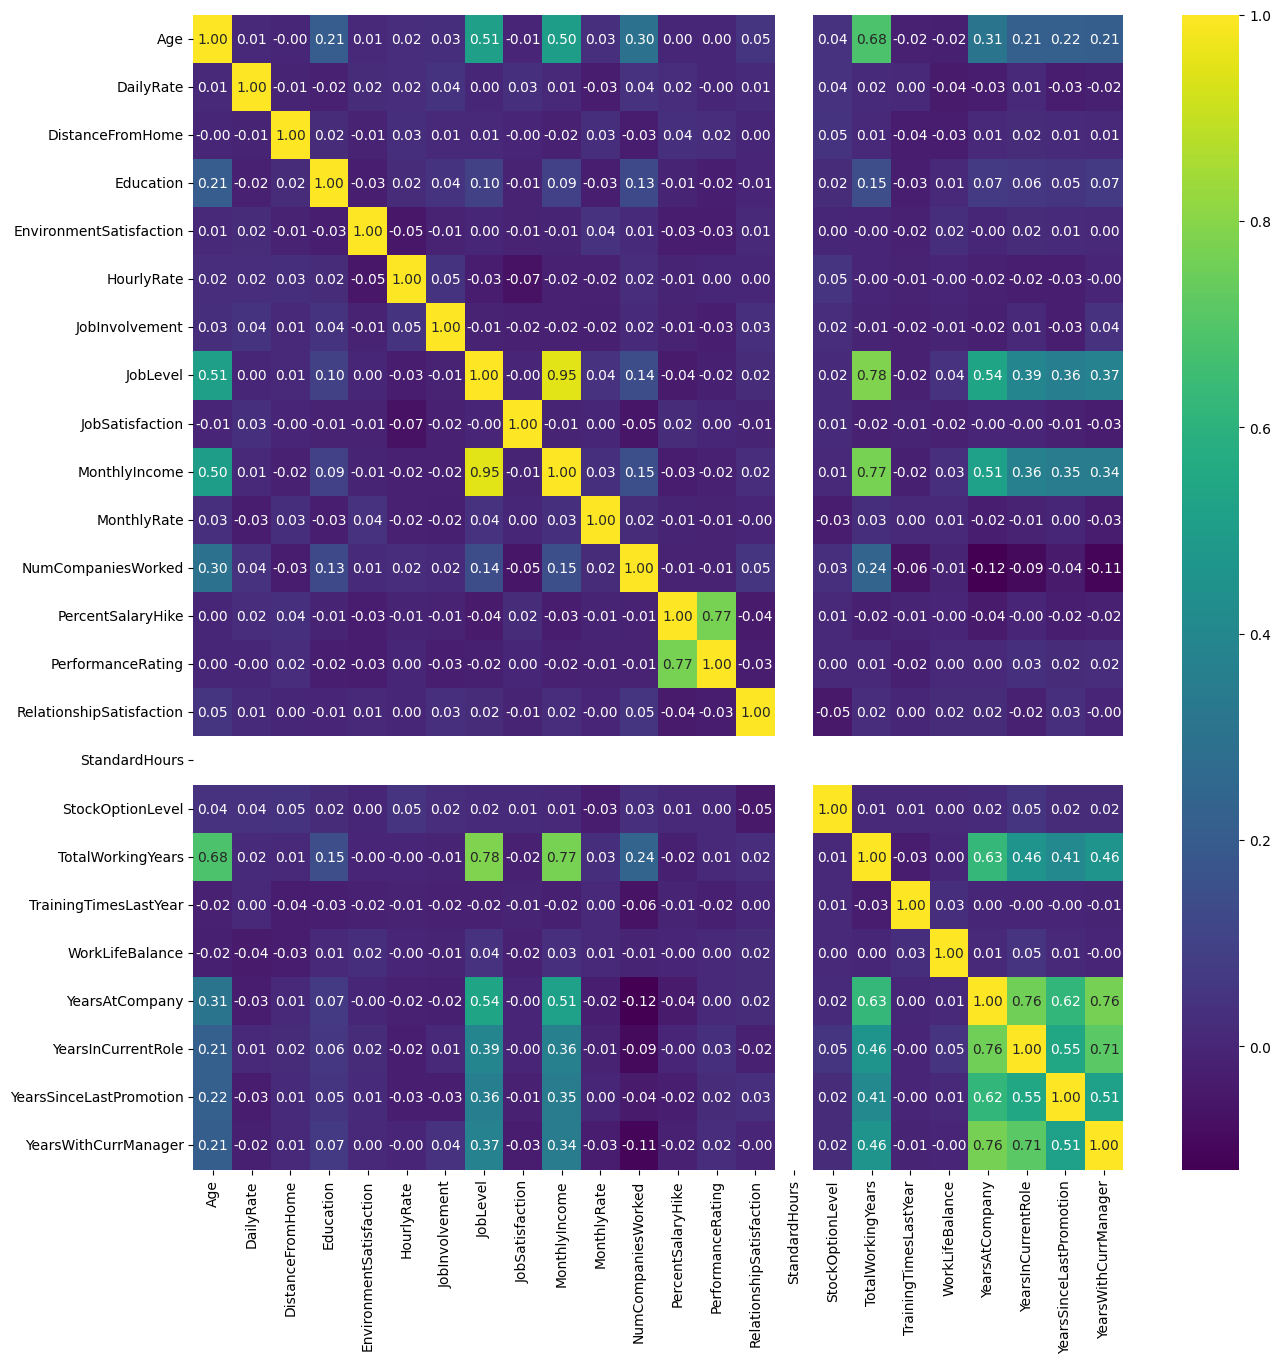

In [61]:
X=HR_df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=HR_df[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

In [66]:
HR_df.isna().sum()
HR_df['YearsWithCurrManager'].fillna(0, inplace=True)
HR_df.isna().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=HR_df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=HR_df[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.850
Test Model accruracy scores: 0.854
--------------------------------------------------------------------------


# Observation 

*85% accuracy.In the next step, we shall be working to increase the efficiency further.*
